## Polynomial Curve Fitting: Ridge Regression

### Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Functions

In [2]:
def poly_features(x, M):
    
    N = len(x)
    
    x_poly = np.zeros([N, M+1], dtype=np.float64)

    for i in range(N):
        for j in range(M+1):
            x_poly[i, j] = np.power(x[i], j)
    
    return x_poly

In [3]:
def normal_equation(x, y):
    
    # Normal equation: w = ((x'*x)^-1) *x'*y

    xT = x.T
    w = np.dot(np.dot(np.linalg.pinv(np.dot(xT, x) ), xT), y)
    
    return w

In [4]:
def normal_equation_ridge(X, y, M, L):
    
    # Normal equation: w = ((X'*X)^-1 + L*I) *X'*y
    
    I = np.identity(M+1)

    XT = X.T
    w = np.dot(np.dot(np.linalg.pinv(np.dot(XT, X) + L*I), XT), y)
    
    return w

In [5]:
def preditct(X, w):
    
    y = np.dot(X, w)
    
    return y

In [6]:
def error(y, y_pred):
    
    N = len(y)
    
    sse = np.sum(np.power(y_pred-y, 2))/2 # Sum-of-squares error
    
    rmse = np.sqrt(2*sse/N) # Root mean squere error
    
    return sse, rmse

In [7]:
class CurveFitting:
    def __init__(self, M=1, L=None):
        self.M = M
        self.x_poly = None
        self.w = None
        self.L = L

    def fit(self, X, y):
        self.X_poly = poly_features(X, self.M) # Poynomial features

        if self.L == None:
            self.w = normal_equation(self.X_poly, y) # Normal equation
        else:
            self.w = normal_equation_ridge(self.X_poly, y, self.M, np.exp(self.L)) # Normal equation (Regularization)

    def predict(self, X):
        X_poly = poly_features(X, self.M)
        y_pred = preditct(X_poly, self.w)
        return y_pred

    def get_poly_features(self):
        return self.X_poly

    def get_coefficients(self):
       return self.w

### Generate of synthetic data

#### Fixed

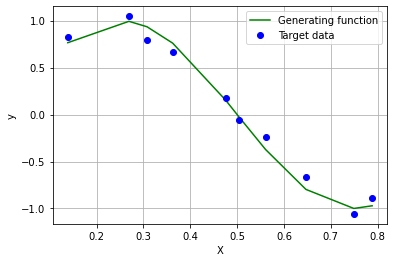

In [8]:
N = 10 # Number of examples

X = np.array([0.1387, 0.2691, 0.3077, 0.3625, 0.4756, 0.5039, 0.5607, 0.6468,0.7490, 0.7881])
X_val = np.array([0.07596669, 0.12331893, 0.18390779, 0.23991615, 0.23995253, 0.35095238, 0.40180803, 0.51324954, 0.62205513, 0.85303112])

y = np.array([0.8260, 1.0469, 0.7904, 0.6638, 0.1731, -0.0592, -0.2433, -0.6630, -1.0581, -0.8839])
y_val = np.array([0.52011295,  0.75369112,  0.77040848,  0.90138754,  1.01839809, 0.7707872 ,  0.70746727,  0.05088296, -0.75202252, -0.7100936])

y = y.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)

func = np.sin(2*np.pi*X)

plt.plot(X, func, 'g')
plt.plot(X, y, 'bo')
plt.xlabel('X')
plt.ylabel('y')
plt.grid()
plt.legend(['Generating function', 'Target data'])

plt.show()

#### Random

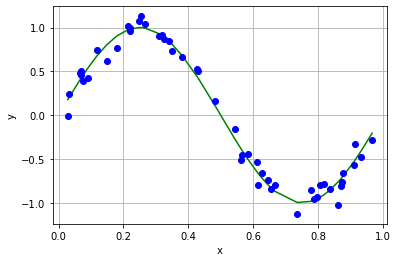

In [12]:
N = 50 # Number of examples

X = np.sort(np.random.rand(N)) # Training random examples
X_val = np.sort(np.random.rand(N)) # Validation random examples

noise = np.random.randn(N) # Gaussian noise

y = np.sin(2*np.pi*X) + 0.1*noise
y_val = np.sin(2*np.pi*X_val) + 0.1*noise

y = y.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)

func = np.sin(2*np.pi*X)

plt.plot(X, func, 'g')
plt.plot(X, y, 'bo')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

plt.show()

### Polynomial order analysis

In [9]:
M_list = [0, 1, 3, 9] # Polynomial degree

sse_array = np.zeros(len(M_list), dtype=np.float64)
rmse_array = np.zeros(len(M_list), dtype=np.float64)
sse_val_array = np.zeros(len(M_list), dtype=np.float64)
rmse_val_array = np.zeros(len(M_list), dtype=np.float64)

y_pred_list = []

i = 0
for M in M_list:
    
   # Training
    cf = CurveFitting(M=M)
    cf.fit(X, y)
    y_pred = cf.predict(X) # Predictions
    sse_array[i], rmse_array[i] = error(y, y_pred) # Errors

    y_pred_list.append(y_pred)
    
    # Validation
    y_val_pred = cf.predict(X_val) # Predictions
    sse_val_array[i], rmse_val_array[i] = error(y_val, y_val_pred) # Errors
    
    if M==9:
        w1 = cf.get_coefficients()
    
    i+=1

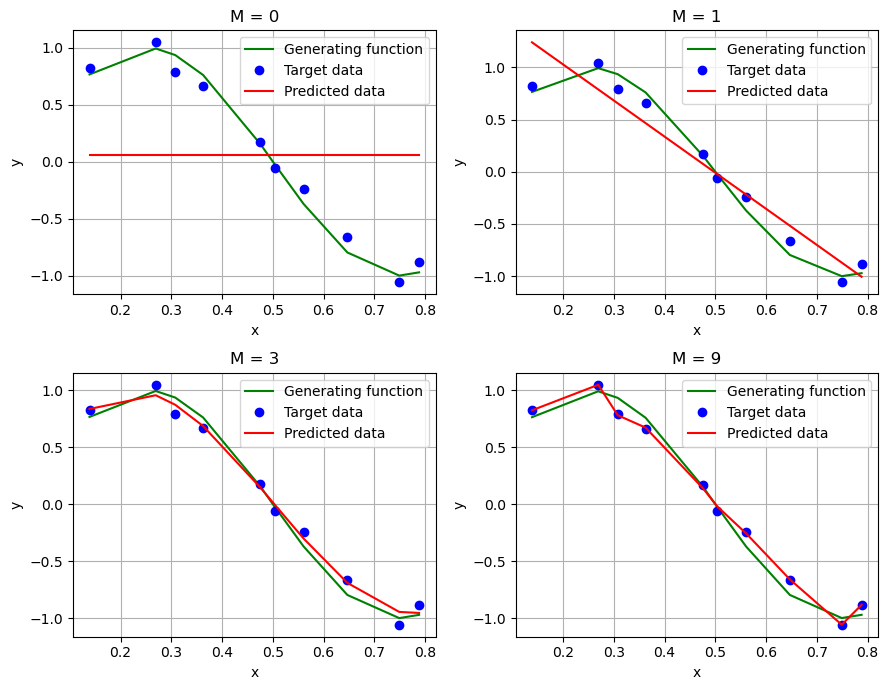

In [10]:
nrows, ncols = 2, 2

fig_luz, axes = plt.subplots(nrows, ncols, figsize=(9, 7), dpi = 100)

i = 0
for r in range(nrows):
    for c in range(ncols):
        
        axes[r,c].plot(X, func, 'g')
        axes[r,c].plot(X, y, 'bo')
        axes[r,c].plot(X, y_pred_list[i], 'r')
        axes[r,c].set_xlabel('x')
        axes[r,c].set_ylabel('y')
        axes[r,c].grid()
        axes[r,c].legend(['Generating function', 'Target data', 'Predicted data'])
        axes[r,c].set_title(f'M = {M_list[i]}')
        
        i+=1

plt.tight_layout()
plt.show()

### Error analysis

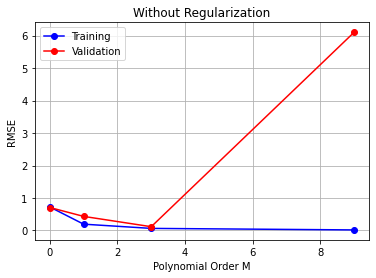

In [11]:
plt.plot(M_list, rmse_array, '-ob')
plt.plot(M_list, rmse_val_array, '-or')
plt.xlabel('Polynomial Order M')
plt.ylabel('RMSE')
plt.title('Without Regularization')
plt.grid()
plt.legend(['Training', 'Validation'])
plt.show()

## Regularization

### Choosing the regularization parameter

In [12]:
M = 9
L_array = np.linspace(-40, 0, num=50)

reg_rmse_val_array = np.zeros(len(L_array), dtype=np.float64)

i = 0
for L in L_array:
    
    # Training
    cf = CurveFitting(M=M, L=L)
    cf.fit(X, y)

    # Validation
    y_pred = cf.predict(X_val) # Predictions
    sse_val, reg_rmse_val_array[i] = error(y_val, y_pred) # Errors

    
    i+=1

In [13]:
index = reg_rmse_val_array.argmin()
print('Index of best validation RMSE:', index)

L_best = L_array[index]
print('ln(lambda):', L_best)

rmse_val_best = reg_rmse_val_array[index]
print('Validation RMSE:', rmse_val_best)

Index of best validation RMSE: 35
ln(lambda): -11.428571428571427
Validation RMSE: 0.12176933951462218


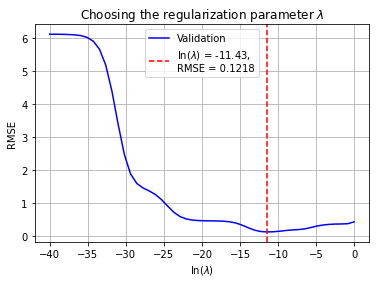

In [14]:
plt.plot(L_array, reg_rmse_val_array, 'b')
plt.axvline(L_best, color='r', linestyle='--')
plt.xlabel('ln($\lambda$)')
plt.ylabel('RMSE')
#plt.title(f'M = {M}')
plt.title('Choosing the regularization parameter $\lambda$')
plt.legend(['Validation', f'ln($\lambda$) = {L_best:.2f}, \nRMSE = {rmse_val_best:.4f}'])
plt.grid()
plt.show()

In [15]:
cf = CurveFitting(M, L_best)
cf.fit(X, y)

w2 = cf.get_coefficients()

In [16]:
print('Coefficients without regularization:', w1.ravel())
print('Coefficients with regularization:', w2.ravel())

Coefficients without regularization: [-1.29718787e+02  2.68398771e+03 -2.20061196e+04  9.41155395e+04
 -2.23751508e+05  2.73077999e+05 -7.55917770e+04 -2.08461185e+05
  2.42278251e+05 -8.24729058e+04]
Coefficients with regularization: [  0.1791103    7.30463105 -17.68514073   0.96551779   6.94992761
   3.06346875  -1.06554764  -1.76820383   0.62065581   4.56821333]


### Polynomial order with regularization

In [17]:
M_list = [0, 1, 3, 9] # Polynomial degree

reg_sse_array = np.zeros(len(M_list), dtype=np.float64)
reg_rmse_array = np.zeros(len(M_list), dtype=np.float64)
reg_sse_val_array = np.zeros(len(M_list), dtype=np.float64)
reg_rmse_val_array = np.zeros(len(M_list), dtype=np.float64)

L_array = np.linspace(-40, 0, num=50)

i = 0
for M in M_list:
    
    sse_list = []
    rmse_list = []
    sse_val_list = []
    rmse_val_list = []
    
    for L in L_array:

        # Training
        cf = CurveFitting(M=M, L=L)
        cf.fit(X, y)
        y_pred = cf.predict(X) # Predictions
        sse, rmse = error(y, y_pred) # Errors
        
        sse_list.append(sse)
        rmse_list.append(rmse)

        # Validation
        y_val_pred = cf.predict(X_val) # Predictions
        sse_val, reg_rmse = error(y_val, y_val_pred) # Errors

        sse_val_list.append(sse_val)
        rmse_val_list.append(reg_rmse)
        
    index = np.argmin(rmse_val_list)
    L_best = L_array[index]

    reg_sse_array[i] = sse_list[index]
    reg_rmse_array[i] = rmse_list[index]
    reg_sse_val_array[i] = sse_val_list[index]
    reg_rmse_val_array[i] = rmse_val_list[index]
    
    i+=1

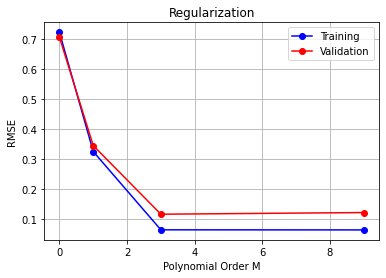

In [18]:
plt.plot(M_list, reg_rmse_array, '-ob')
plt.plot(M_list, reg_rmse_val_array, '-or')
plt.xlabel('Polynomial Order M')
plt.ylabel('RMSE')
plt.title('Regularization')
plt.grid()
plt.legend(['Training', 'Validation'])
plt.show()